# Titanic

- The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

- It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

- The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

<img src="https://wdfyfe.files.wordpress.com/2012/04/titanic.jpg"
    style="width:50%; margin: 0 auto "></img>



**DataSet**  :   [Titanic-Dataset](https://drive.google.com/drive/u/2/folders/13dpzjmBgQN-m0t9rw7K46fbHW-tJNqjM)


### Data Set Description

- Survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex (Male and Female)
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

### Contents of the Notebook:

- ### Part 1 EDA (Data Exploratory Analysis:



 - Analysis of the features.
 
 - Finding any relations or trends considering multiple features.
 
 
- ### Part 2: Feature Engineering and Data Cleaning:


 - Adding any few features.

 - Removing redundant features.

 - Converting features into suitable form for modeling.
 
 
- ### Part3: Predictive Modeling


 - Running Basic Algorithms.

 - Cross Validation.

 - Ensembling.

 - Important Features Extraction.

## Part 1:  EDA -  Exploratory Data Analysis

### Import Libraries

In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For stylish plot
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load data

In [575]:
data = pd.read_csv('Titanic-Dataset.csv')

In [576]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for total null values

In [577]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 - The Age, Cabin and Embarked have null values. I will try to fix them.
 ----------------------------------------------------------------------------

### Numbers of Survived

In [578]:
print("Total People in titanic : " , data['Survived'].count())
print("UnSurvived-0 : " , data['Survived'].value_counts()[0])
print("Survived-1 : " , data['Survived'].value_counts()[1])

Total People in titanic :  891
UnSurvived-0 :  549
Survived-1 :  342


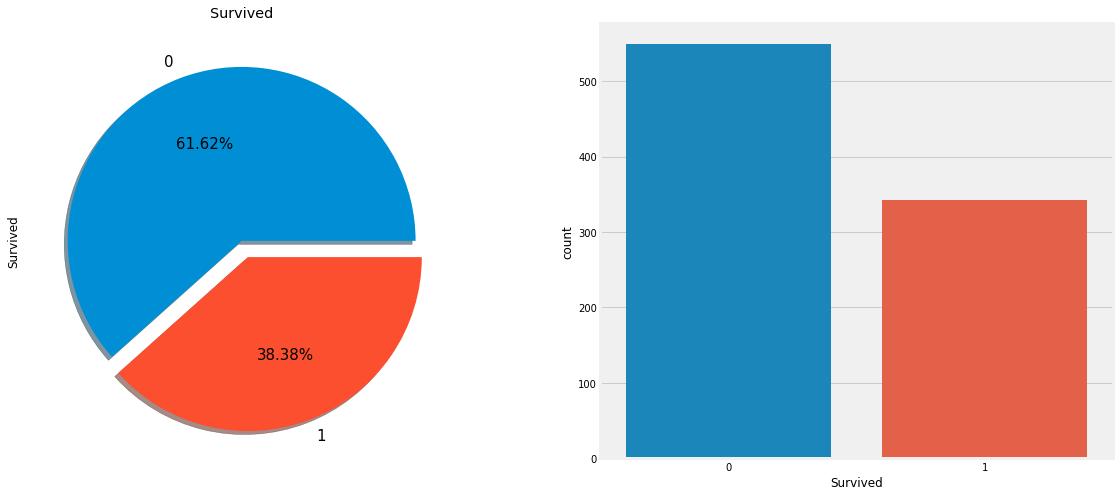

In [579]:
f,ax = plt.subplots(1,2 ,figsize=(18,8))

#pie Chart 
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',fontsize=15,ax=ax[0],shadow=True)
ax[0].set_title("Survived")



#2nd plot - Countplor
sns.countplot('Survived',data=data , ax=ax[1])

plt.show()

- Out of 891 passengers in training set, only around 350 survived  Only **38.4%** of the total training set survived the crash.

# Types Of Features
### Categorical Features:
 - categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
 - Categorical Features in the dataset: Sex,Embarked.

### Ordinal Features:
 - An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
 - Ordinal Features in the dataset: PClass

### Continous Feature:
- A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
- Continous Features in the dataset: Age

## Analysing The Features
---------------------------------------

- ###  Sex  (Categorical Feature)

In [580]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [581]:
pd.crosstab(data.Sex,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


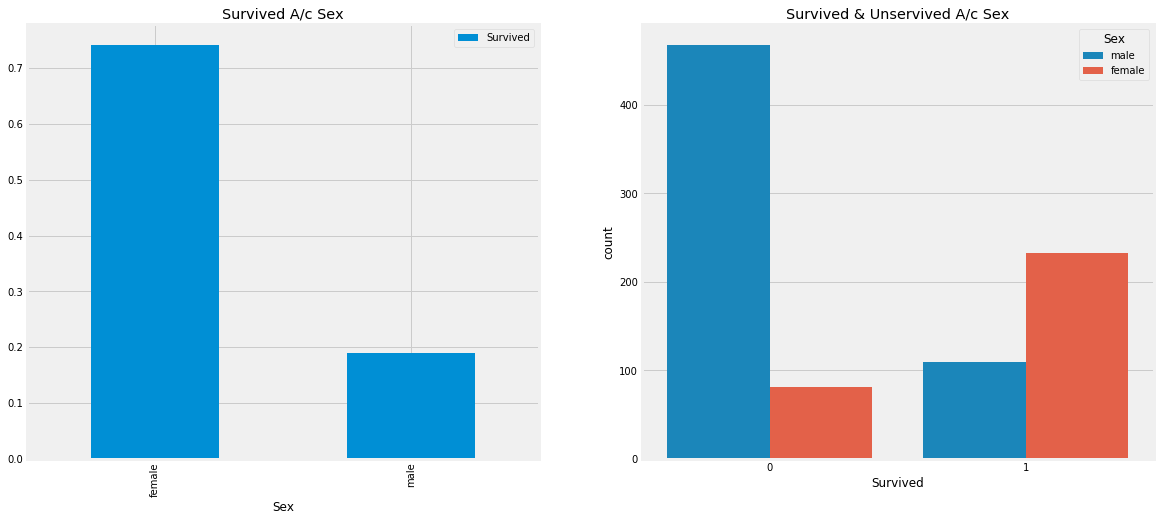

In [582]:
f,ax = plt.subplots(1,2,figsize=(18,8))


data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived A/c Sex")

# Countplot
ax[1].set_title("Survived & Unservived A/c Sex")

sns.countplot("Survived" , hue='Sex' , data=data , ax=ax[1])

plt.show()


- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

- ## Pclass (Ordinal Feature)

In [583]:
data[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [584]:
pd.crosstab(data['Pclass'],data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


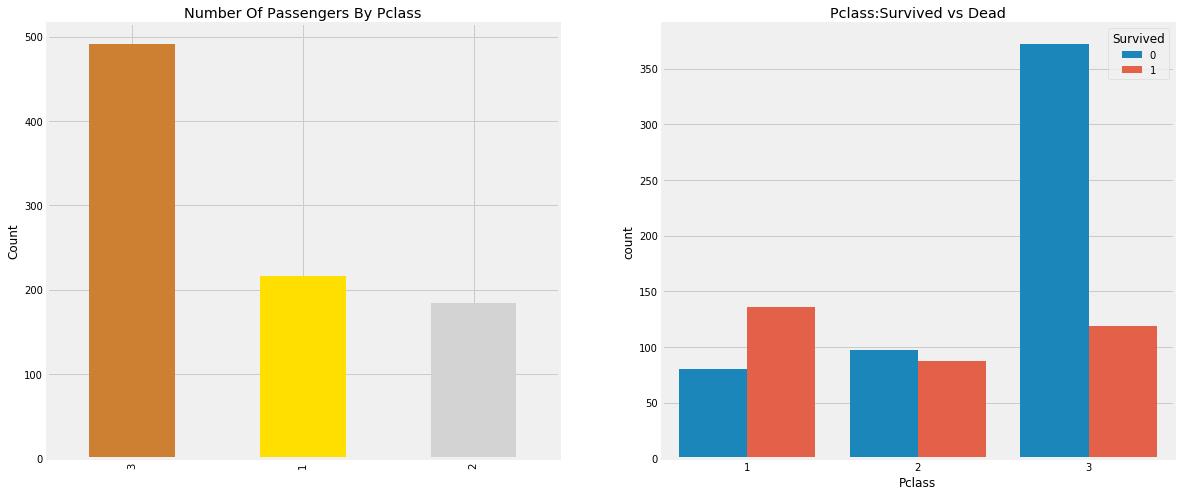

In [585]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')



sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

In [586]:
pd.crosstab([data.Survived , data.Sex],data.Pclass,margins=True).style.background_gradient('summer_r')

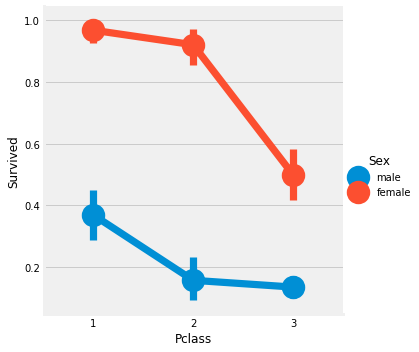

In [587]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died. 

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

 - ## Age   ( Continous Feature)

In [588]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


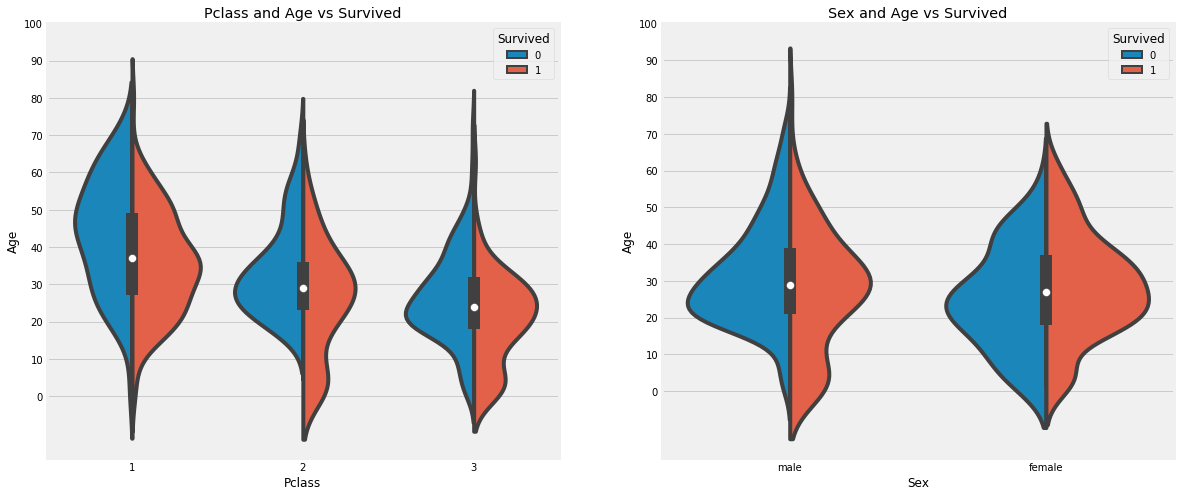

In [589]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations:
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.


arrow_upward

arrow_downward

delete

unfold_less

more_vert
As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

### lets extract the Salutations

In [590]:
data['initial'] = 0
for i in data['initial']:
    data['initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [591]:
pd.crosstab(data.initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [592]:
data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [593]:
pd.crosstab(data.initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


### lets check the average age by Initials

In [594]:
data.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages
  - Assigning the NaN Values with the Ceil values of the mean ages 

In [595]:
data.loc[(data.Age.isnull())&(data.initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.initial=='Other'),'Age']=46

In [596]:
data.Age.isnull().sum(),data.Age.isnull().any()

(0, False)

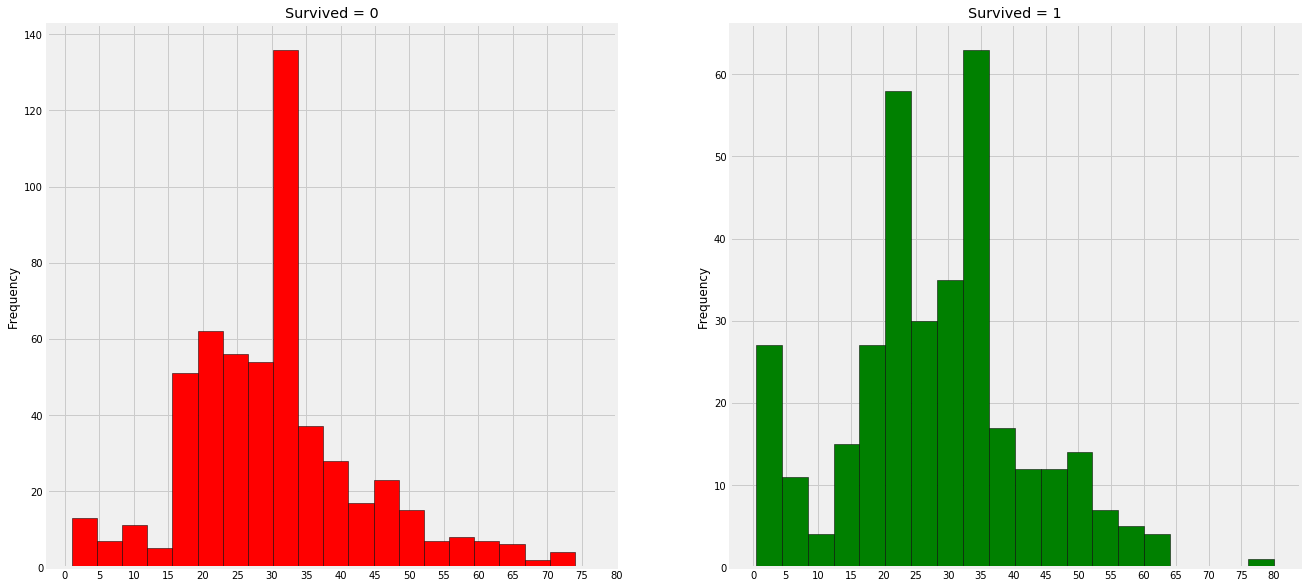

In [597]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
x1 =list(range(0,85,5))
ax[0].set_xticks(x1)
ax[0].set_title("Survived = 0")


data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x1 =list(range(0,85,5))
ax[1].set_xticks(x1)

ax[1].set_title("Survived = 1")
plt.show()


# Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

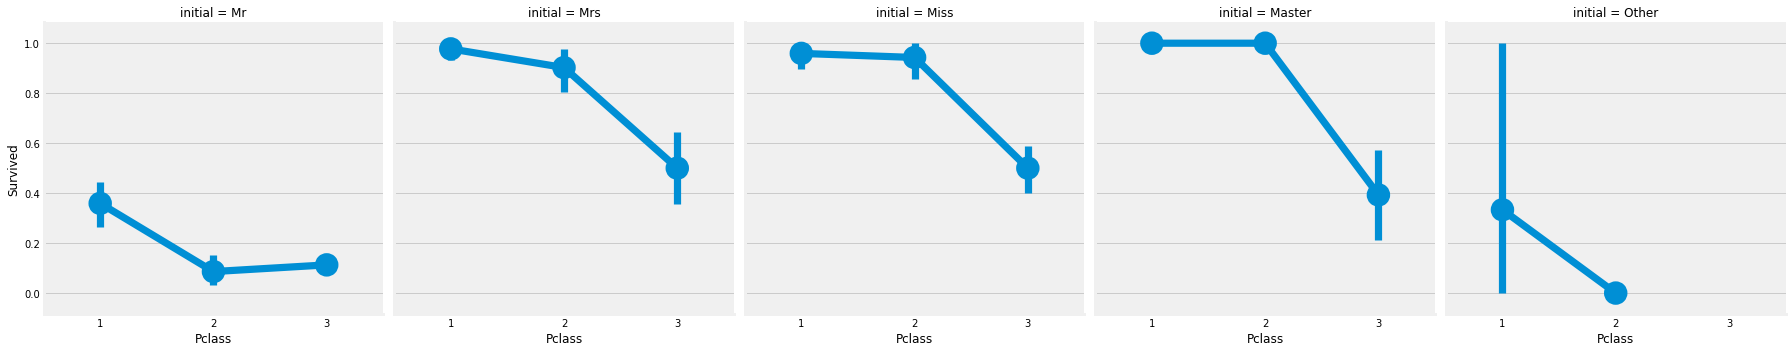

In [598]:
sns.factorplot('Pclass','Survived',col='initial',data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

 - ### Embarked (Categorical Value)

In [664]:
pd.crosstab([data.Embarked , data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient('summer_r')

### Chances for Survival by Port Of Embarkation

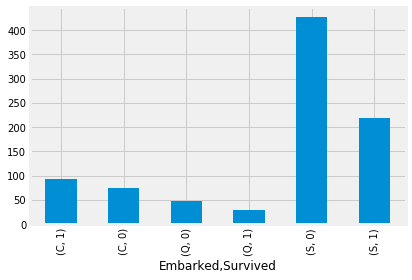

In [665]:
data.groupby('Embarked')['Survived'].value_counts().plot.bar()

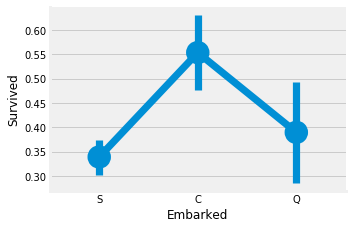

In [666]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

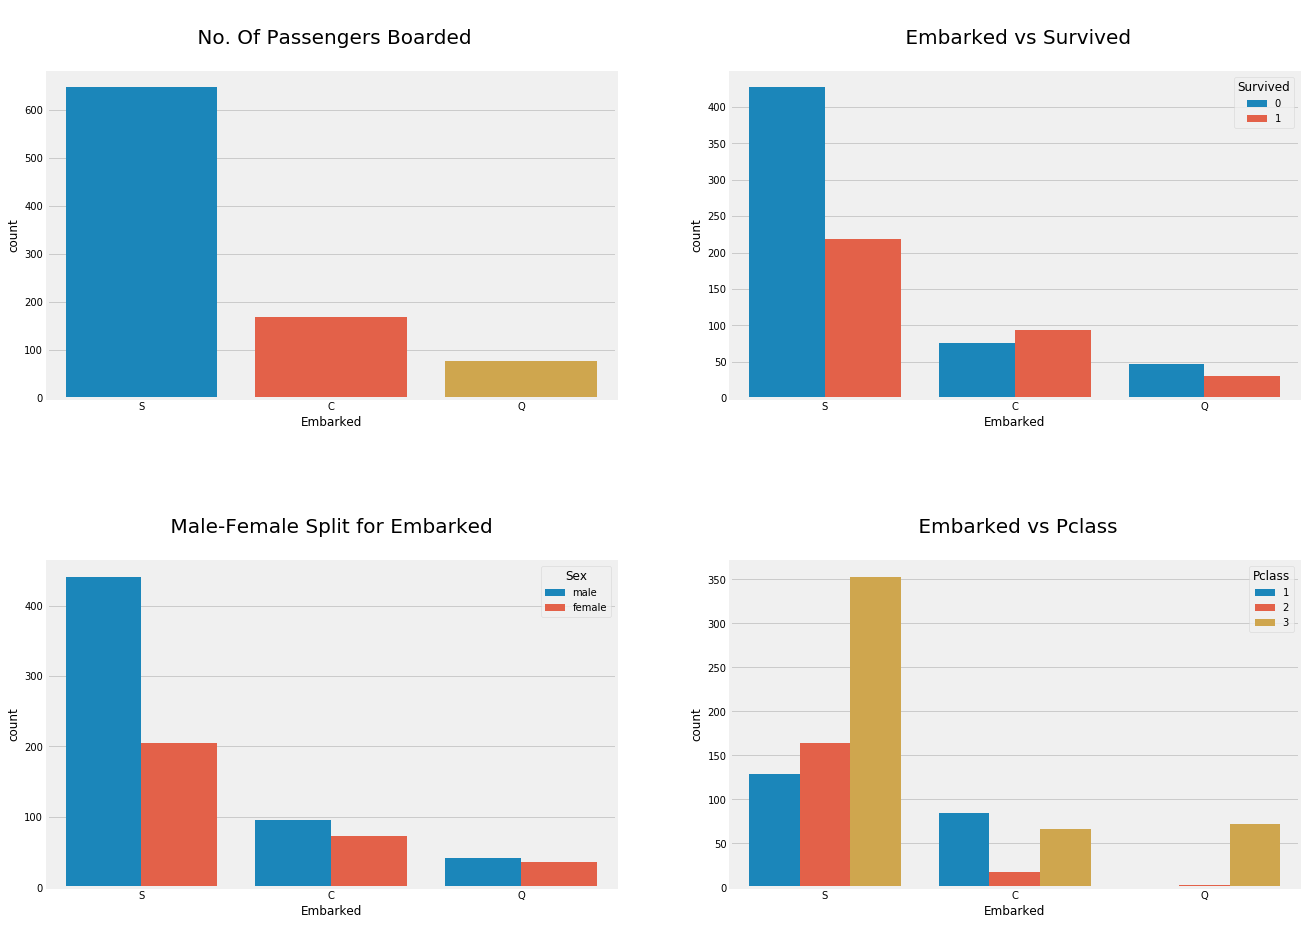

In [667]:
f,ax=plt.subplots(2,2,figsize=(20,15))
plt.subplots_adjust(wspace=0.2,hspace=0.5)

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('\n No. Of Passengers Boarded\n',fontsize=20)



sns.countplot('Embarked',hue='Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('\n Embarked vs Survived\n',fontsize=20)



ax[1,0].set_title('\n Male-Female Split for Embarked \n',fontsize=20)
sns.countplot("Embarked",hue='Sex',data=data,ax=ax[1,0])


ax[1,1].set_title('\n\n Embarked vs Pclass\n',fontsize=20)
sns.countplot("Embarked",hue='Pclass',data=data,ax=ax[1,1])



plt.show()

1) Maximum passenegers boarded from S. Majority of them being from Pclass3.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass3.

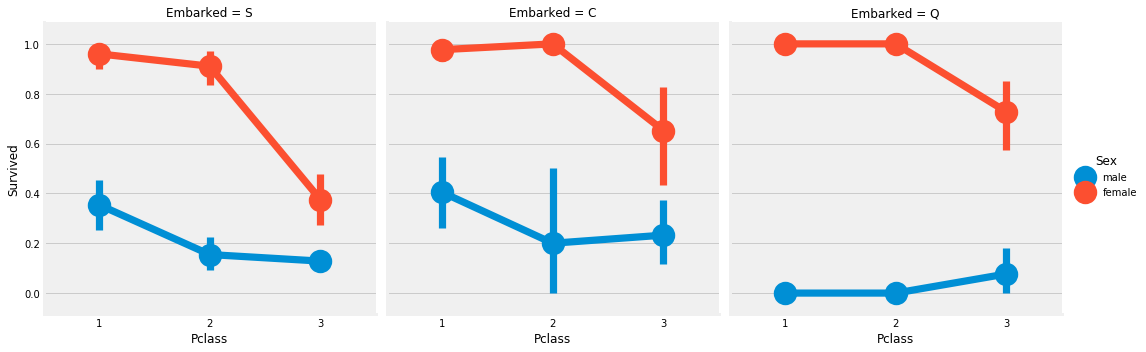

In [668]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)

### Observations:
1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2) Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3) Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

### Filling Embarked NaN
- As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [669]:
data['Embarked'].fillna('S',inplace=True)